###Numbers of airline passengers.
This time series inc. both trend and seasonal variation has been used as an example how to apply several prediction methodss

Source: https://www.kaggle.com/rakannimer/air-passengers


In [ ]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

#set style
sns.set_style('whitegrid')

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/DA_Python

Mounted at /gdrive
/gdrive/MyDrive/DA_Python


In [ ]:
#load data
df=pd.read_csv('AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<Axes: title={'center': 'Number of airline passengers over years'}, xlabel='Month'>

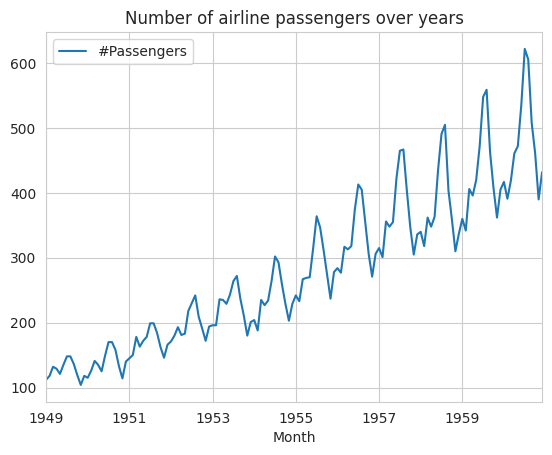

In [ ]:
df.plot(title='Number of airline passengers over years')

###Component of time series

[]

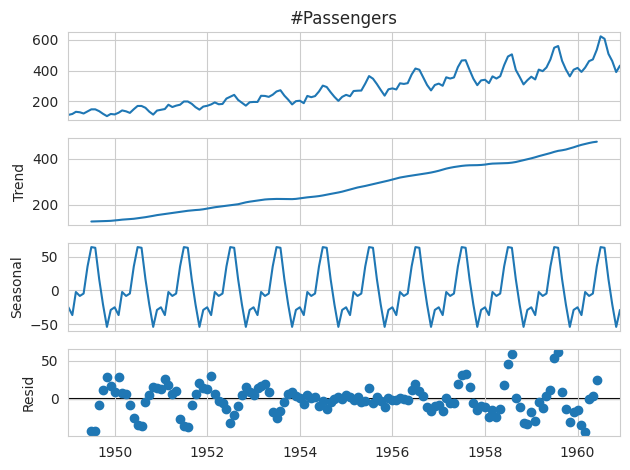

In [ ]:
#decompose the time series into its components - trend, seasonal and residuals
seasonal_decompose(df['#Passengers']).plot()
plt.plot()

From the components, we've noticed here a noticeable trend (growing, linear) and seasonal patterns in the numbers of airline passengers monthly over the years.

###Fit suitable model

In [ ]:
#identify the frequency of time stamp - MS Month start
freq= pd.infer_freq(df.index)
print(freq)

MS


In [ ]:
#As we've noticed the trend and seasonal from the components, we'll use the triple exponential smoothing - Holt-Winters Seasonal model here, the frequency would be the same one that we identified from previous step 'MS',
#trend ='add' (additive) as from the components - it shows an increasing linear trend
#seasonal ='mul' (multiplicative) as it shows the seasonal effect increasing/decreasing with the level of the series
model= ExponentialSmoothing(df['#Passengers'] , trend='add', seasonal='mul',
                              seasonal_periods=8, freq='MS').fit()

In [ ]:
#adding the predicted values from the exponetial smoothing model
df['Prediction'] = model.fittedvalues
df.head()


,#Passengers,Prediction
Month,,
1949-01-01,112,123.400424
1949-02-01,118,113.345698
1949-03-01,132,127.113315
1949-04-01,129,134.868551
1949-05-01,121,120.793503


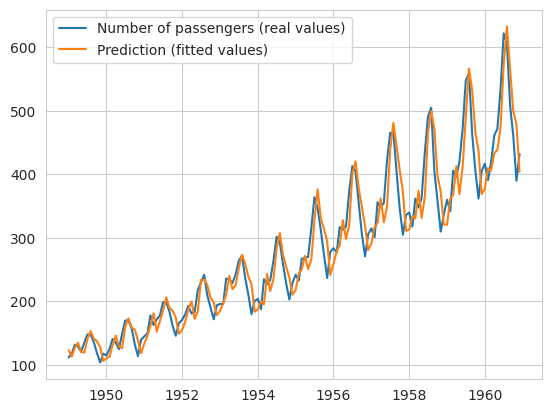

In [ ]:
#Plotting the real values and fitted/predicted values
plt.plot(df.index, df['#Passengers'], label='Number of passengers (real values)')
plt.plot(df.index, df['Prediction'], label='Prediction (fitted values)')
plt.legend()

###Goodness of fit

In [ ]:
#adding error column to the df, where error is residual, i.e. difference between the real values and fitted/predicted values.
df['Error'] =model.resid
df.head()

,#Passengers,Prediction,Error
Month,,,
1949-01-01,112,123.400424,-11.400424
1949-02-01,118,113.345698,4.654302
1949-03-01,132,127.113315,4.886685
1949-04-01,129,134.868551,-5.868551
1949-05-01,121,120.793503,0.206497


Text(0.5, 1.0, 'Prediction error')

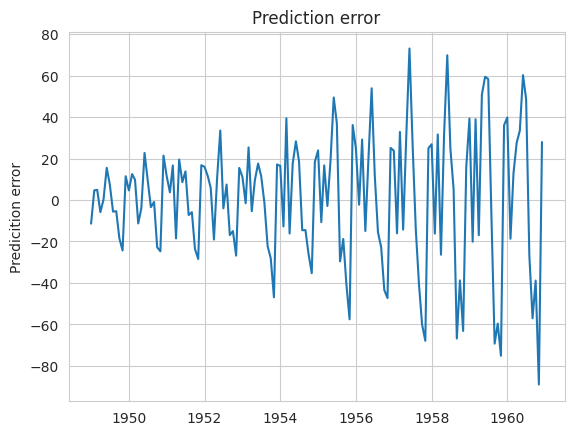

In [ ]:
#plotting the error and it seems to be randomly distributed which is a good sign
plt.plot(df.index, df['Error'])
plt.ylabel('Predicition error')
plt.title('Prediction error')

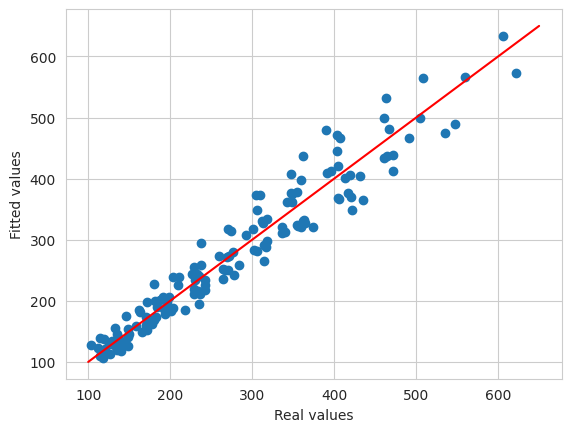

In [ ]:
#compare real and fitted values
plt.scatter(df['#Passengers'], df['Prediction'])
plt.xlabel('Real values')
plt.ylabel('Fitted values')
plt.plot([100,650],[100,650],color='red')

In [ ]:
model.summary()

Dep. Variable:,#Passengers,No. Observations:,144
Model:,ExponentialSmoothing,SSE,137619.317
Optimized:,True,AIC,1012.190
Trend:,Additive,BIC,1047.828
Seasonal:,Multiplicative,AICC,1015.446
Seasonal Periods:,8,Date:,"Sun, 23 Feb 2025"
Box-Cox:,False,Time:,17:53:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9924914,alpha,True
smoothing_trend,0.0041030,beta,True


###Forecasting

In [ ]:
#to see the last timestamps
df.tail()

,#Passengers,Prediction,Error
Month,,,
1960-08-01,606,632.741508,-26.741508
1960-09-01,508,565.033267,-57.033267
1960-10-01,461,499.839708,-38.839708
1960-11-01,390,478.926209,-88.926209
1960-12-01,432,404.066240,27.933760


In [ ]:
##as the last time label is 1960-12-01, the first time of the predicted model has to be the one right next to it - so 1961-01-01, frequency has to be same as in the fitted model, hence 'MS'
time_stamps = pd.date_range('1961-01-01', periods=8, freq='MS')
#or use df.index[-1]+pd.tseries.offsets.MonthBegin(1) to determine the first time stamp /MonthBegin for MS, MonthEnd for ME
time_stamps

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
#generate forecast for the upcoming 8 months from the fitted model
prediction2=model.forecast(8)
prediction2

,0
1961-01-01,410.916064
1961-02-01,413.506353
1961-03-01,443.482600
1961-04-01,451.267994
1961-05-01,420.505961
1961-06-01,413.314049
1961-07-01,429.033111
1961-08-01,443.737193


In [ ]:
df_prediction2=pd.DataFrame(prediction2, columns=['Prediction'])
df_prediction2

,Prediction
1961-01-01,410.916064
1961-02-01,413.506353
1961-03-01,443.482600
1961-04-01,451.267994
1961-05-01,420.505961
1961-06-01,413.314049
1961-07-01,429.033111
1961-08-01,443.737193


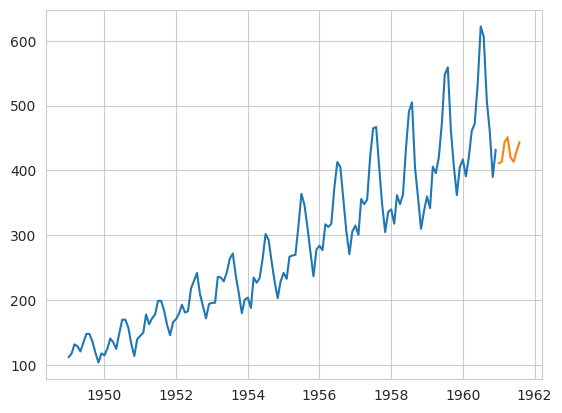

In [ ]:
plt.plot(df.index, df['#Passengers'], label='Number of passengers (real values)')
plt.plot(df_prediction2.index, df_prediction2['Prediction'], label='Prediction')

###Simple and double exponential smoothing

In [ ]:
#simple exponential smoothing /no trend, no seasonal
model1 = ExponentialSmoothing(df['#Passengers'], freq='MS').fit()
#double exponential smoothing /no seasonal, just trend
model2 = ExponentialSmoothing(df['#Passengers'], trend='add', freq='MS').fit()

In [ ]:
df['Prediction, model 1'] = model1.fittedvalues
df['Prediction, model 2'] = model2.fittedvalues
df.head()

,#Passengers,Prediction,Error,"Prediction, model 1","Prediction, model 2"
Month,,,,,
1949-01-01,112,123.400424,-11.400424,112.0,120.527273
1949-02-01,118,113.345698,4.654302,112.0,114.102394
1949-03-01,132,127.113315,4.886685,118.0,120.040657
1949-04-01,129,134.868551,-5.868551,132.0,134.001539
1949-05-01,121,120.793503,0.206497,129.0,131.085845


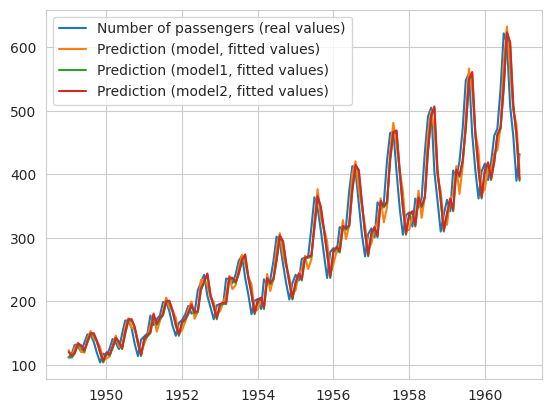

In [ ]:
plt.plot(df.index, df['#Passengers'], label='Number of passengers (real values)')
plt.plot(df.index, df['Prediction'], label='Prediction (model, fitted values)')
plt.plot(df.index, df['Prediction, model 1'], label='Prediction (model1, fitted values)')
plt.plot(df.index, df['Prediction, model 2'], label='Prediction (model2, fitted values)')

plt.legend()